# Supervised Learning - Regression Example
### Importing Libraries
A nice feature with notebooks, is being able to easily embed commands like pip to install modules if they are not already.
 - Matplotlib is a library for creating graphs and other visuals
 - Numpy is a high-performance mathematics library
 - Pandas is a library for working with datasets
 - Seaborn works with matplotlib to create some nice combined graphics
 - TensorFlow is the platform that the AI code will run on, with Keras being the interface to TF

In [2]:
!pip install -q seaborn pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.1.0


### Reading & Formatting the Dataset
First, we start by reading the CSV into a pandas dataframe - we print the tail of it so we can understand the format of the data.

In [38]:
rawDS = pd.read_csv("Fish.csv")
rawDS.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


We make a copy of the dataset where we will make changes to it without ruining the original, should we need to refer back to it later
We also split the species column into columns for each possible value - AI likes to work with numbers not words

In [39]:
ds = rawDS.copy()
ds = pd.get_dummies(ds, prefix='', prefix_sep='')
ds

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


Below, we put some of the data into pairs plot, it's pretty clear there is a correlation between weight, height and width

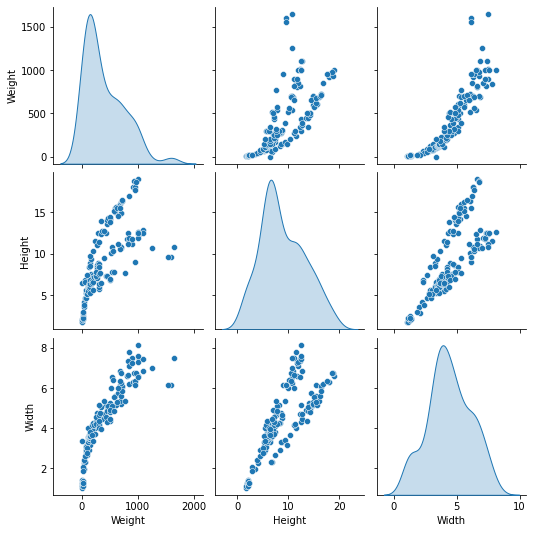

In [6]:
sb.pairplot(ds[['Weight', 'Height', 'Width']], diag_kind='kde')

In [7]:
trainDS = ds.sample(frac=0.8)
testDS = ds.drop(trainDS.index)

trainFeatures = trainDS.copy()
testFeatures = testDS.copy()

trainLabels = trainFeatures.pop('Weight')
testLabels = testFeatures.pop('Weight')

In [8]:
normaliser = keras.layers.experimental.preprocessing.Normalization()
normaliser.adapt(np.array(trainFeatures))
with np.printoptions(precision=2):
    print("Original " + str(trainFeatures[:1].values) + "\n")
    print("Normalised " + str(normaliser(np.array(trainFeatures[:1])).numpy()))

Original [[20.   22.   23.5   5.88  3.52  0.    0.    1.    0.    0.    0.    0.  ]]

Normalised [[-0.59 -0.56 -0.63 -0.68 -0.48 -0.51 -0.29  1.33 -0.34 -0.39 -0.29 -0.2 ]]


In [9]:
model = keras.Sequential([normaliser, keras.layers.Dense(units=1)])

In [10]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [11]:
np.array(trainFeatures)

array([[20. , 22. , 23.5, ...,  0. ,  0. ,  0. ],
       [25.4, 27.5, 28.9, ...,  0. ,  0. ,  0. ],
       [18.2, 19.8, 22.2, ...,  1. ,  0. ,  0. ],
       ...,
       [21.5, 23.5, 25. , ...,  0. ,  0. ,  0. ],
       [ 7.5,  8.4,  8.8, ...,  0. ,  0. ,  0. ],
       [13.8, 15. , 16.2, ...,  0. ,  1. ,  0. ]])

In [12]:
%%time
history = model.fit(np.array(trainFeatures), np.array(trainLabels), verbose=0, epochs=1500, validation_split = 0.2)

Wall time: 10.6 s


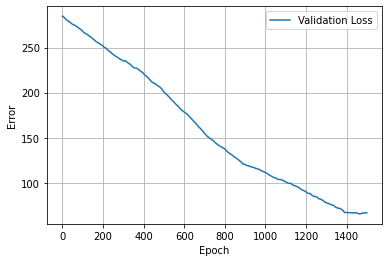

In [43]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)


In [14]:
modelEval = model.evaluate(testFeatures, testLabels)

32/32 [==============================] - 0s 1ms/sample - loss: 85.4344


In [32]:
results = model.predict(testFeatures).flatten()

In [16]:
results

array([ 452.76025 ,  505.37582 ,  482.04416 ,  582.29144 ,  627.448   ,
        618.4039  ,  663.5848  ,  735.978   ,  890.37146 ,   16.00058 ,
         94.32742 ,  171.09857 ,  246.26825 ,  -16.928284,  150.07925 ,
        260.15503 ,  386.6925  ,  688.57874 ,  816.96716 ,  851.5278  ,
        880.9423  ,  905.3577  ,  963.6054  ,  935.5736  ,  318.8822  ,
        403.50443 ,  946.0328  , 1122.9937  ,  -17.779816,   12.489868,
         30.125244,   31.146118], dtype=float32)

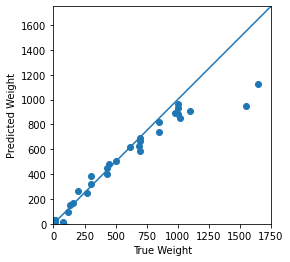

In [17]:
a = plt.axes(aspect='equal')
plt.scatter(testLabels, results)
plt.xlabel('True Weight')
plt.ylabel('Predicted Weight')
lims = [0, 1750]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

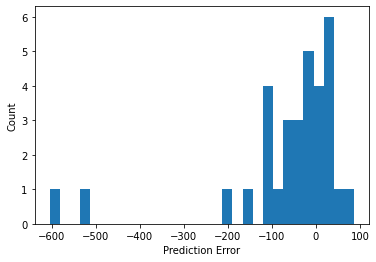

In [18]:
error = results - testLabels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [19]:
dnnModel = tf.keras.Sequential([normaliser, tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.Dense(64, activation='relu'), tf.keras.layers.Dense(1)])
dnnModel.compile(loss='mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.01))


In [20]:
%%time
dnnHistory = dnnModel.fit(np.array(trainFeatures), np.array(trainLabels), validation_split = 0.2, verbose=0, epochs=200)

Wall time: 1.95 s


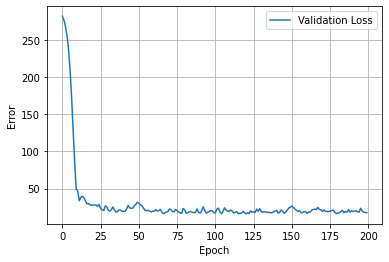

In [42]:
plt.plot(dnnHistory.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

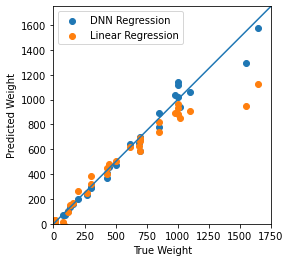

In [36]:
dnnResults = dnnModel.predict(testFeatures).flatten()
a = plt.axes(aspect='equal')
a.scatter(testLabels, dnnResults, label='DNN Regression')
a.scatter(testLabels, results, label='Linear Regression')
a.legend()
plt.xlabel('True Weight')
plt.ylabel('Predicted Weight')
lims = [0, 1750]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)